In [13]:
from datascience import *
path_data = 'https://github.com/data-8/textbook/blob/main/assets/data/trip.csv'
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np


# Sampling from a Population

The law of averages also holds when the random sample is drawn from individuals in a large population.

As an example, we will study a population of flight delay times. The table `united` contains data for United Airlines domestic flights departing from San Francisco in the summer of 2015. The data are made publicly available by the [Bureau of Transportation Statistics](http://www.transtats.bts.gov/Fields.asp?Table_ID=293) in the United States Department of Transportation.

There are 13,825 rows, each corresponding to a flight. The columns are the date of the flight, the flight number, the destination airport code, and the departure delay time in minutes. Some delay times are negative: those flights left early.

In [4]:
united = Table.read_table(path_data + 'united_summer2015.csv')
united

FileNotFoundError: [Errno 2] No such file or directory: '../../../assets/data/united_summer2015.csv'

One flight departed 16 minutes early, and one was 580 minutes late. The other delay times were almost all between -10 minutes and 200 minutes, as the histogram below shows.

In [5]:
united.column('Delay').min()

NameError: name 'united' is not defined

In [ ]:
united.column('Delay').max()

580

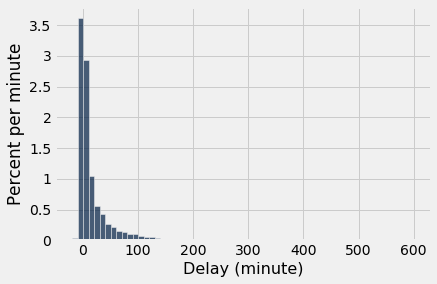

In [ ]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
united.hist('Delay', bins = delay_bins, unit = 'minute')

For the purposes of this section, it is enough to zoom in on the bulk of the data and ignore the 0.8% of flights that had delays of more than 200 minutes. This restriction is just for visual convenience; the table still retains all the data.

In [ ]:
united.where('Delay', are.above(200)).num_rows/united.num_rows

0.008390596745027125

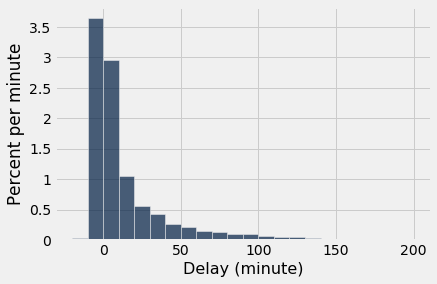

In [ ]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')

The height of the [0, 10) bar is just under 3% per minute, which means that just under 30% of the flights had delays between 0 and 10 minutes. That is confirmed by counting rows:

In [ ]:
united.where('Delay', are.between(0, 10)).num_rows/united.num_rows

0.2935985533453888

## Empirical Distribution of the Sample

Let us now think of the 13,825 flights as a population, and draw random samples from it with replacement. It is helpful to package our code into a function. The function `empirical_hist_delay` takes the sample size as its argument and draws an empiricial histogram of the results.

In [ ]:
def empirical_hist_delay(n):
    united.sample(n).hist('Delay', bins = delay_bins, unit = 'minute')

As we saw with the dice, as the sample size increases, the empirical histogram of the sample more closely resembles the histogram of the population. Compare these histograms to the population histogram above.

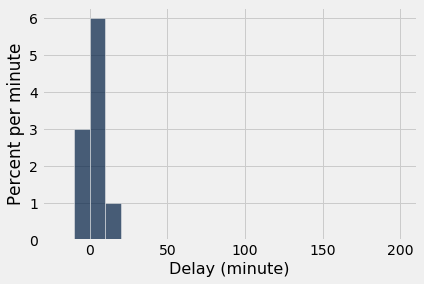

In [ ]:
empirical_hist_delay(10)

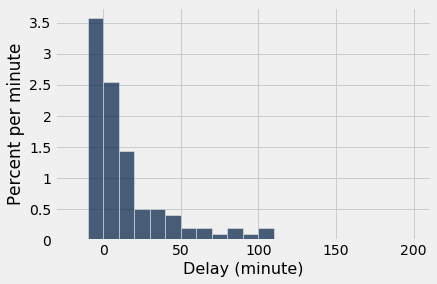

In [ ]:
empirical_hist_delay(100)

The most consistently visible discrepancies are among the values that are rare in the population. In our example, those values are in the the right hand tail of the distribution. But as the sample size increases, even those values begin to appear in the sample in roughly the correct proportions.

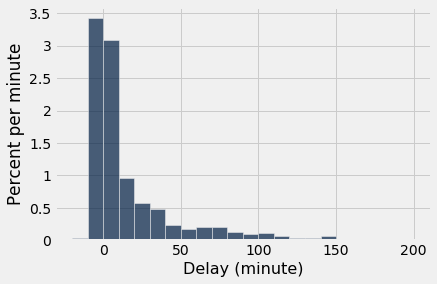

In [ ]:
empirical_hist_delay(1000)

## Convergence of the Empirical Histogram of the Sample
What we have observed in this section can be summarized as follows:

For a large random sample, the empirical histogram of the sample resembles the histogram of the population, with high probability.

This justifies the use of large random samples in statistical inference. The idea is that since a large random sample is likely to resemble the population from which it is drawn, quantities computed from the values in the sample are likely to be close to the corresponding quantities in the population.

In [16]:
path_data = 'https://raw.githubusercontent.com/data-8/textbook/main/assets/data/'
trips = Table.read_table(path_data + 'trip.csv')
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


In [17]:
trips.column('Duration').min()

60

In [18]:
trips.column('Duration').max()

17270400

/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges


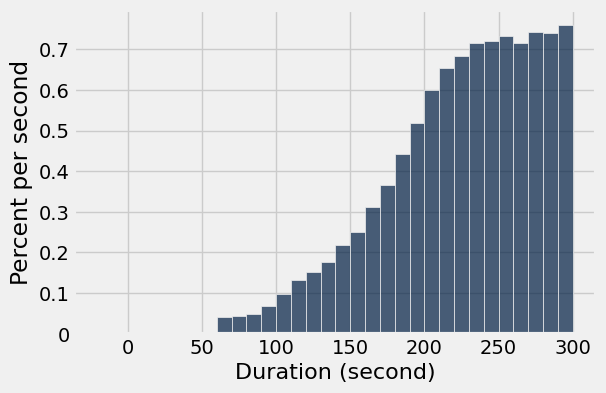

In [20]:
duration_bins = np.append(np.arange(-20, 301, 10), 300)
trips.hist('Duration', bins = duration_bins, unit = 'second')

I excluded the part after 300 seconds. This is because after 300. They all remain the same value all the times.

In [21]:
np.median(trips.column('Duration'))

511.0

In [22]:
duration_array = trips.column('Duration')
mean_duration = np.mean(duration_array)
print(f"The mean duration is: {mean_duration}")


The mean duration is: 1046.0326611172604


/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


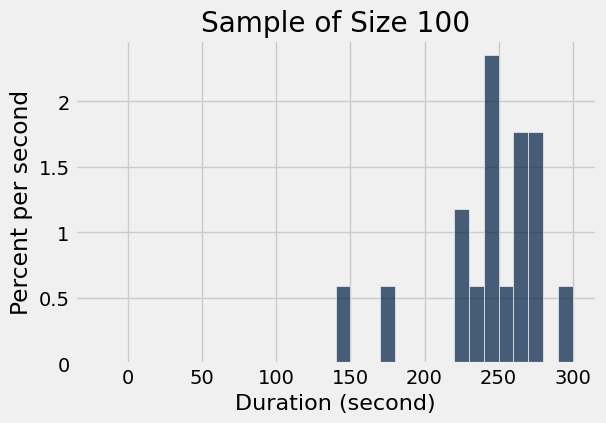

In [23]:
sample_100 = trips.sample(100)
sample_100.hist('Duration', bins = duration_bins, unit = 'second')
plots.title('Sample of Size 100');


In [26]:
def random_sample_median():
    return np.median(trips.sample(100).column('Duration'))


In [27]:
medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

In [28]:
simulated_medians = Table().with_column('Sample Median', medians)
simulated_medians

Sample Median
522.5
479.5
534.5
524.5
471
457.5
524.5
551
490
536


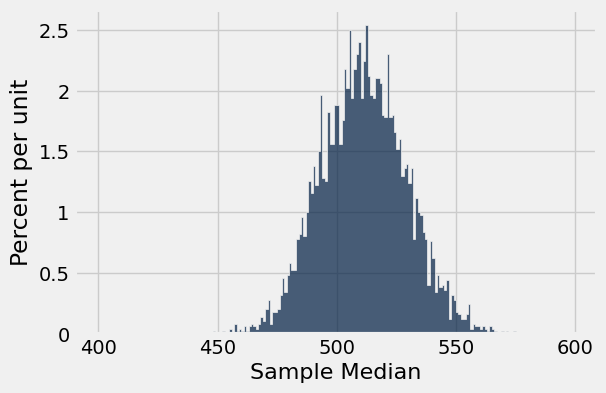

In [38]:
simulated_medians.hist(bins=np.arange(400,600,1))

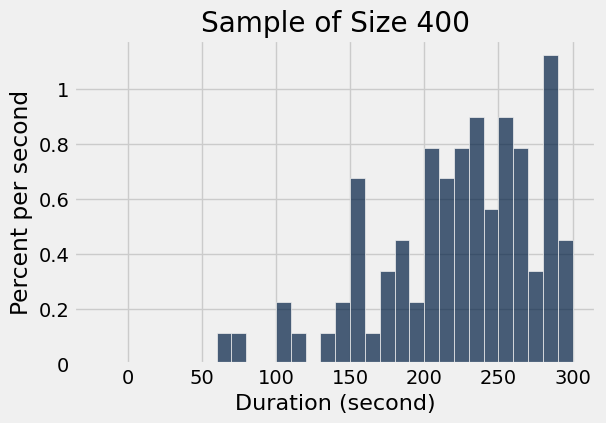

In [31]:
sample_400 = trips.sample(400)
sample_400.hist('Duration', bins = duration_bins, unit = 'second')
plots.title('Sample of Size 400');

In [32]:
def random_sample_median():
    return np.median(trips.sample(400).column('Duration'))

In [33]:
medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

In [34]:
simulated_medians = Table().with_column('Sample Median', medians)
simulated_medians

Sample Median
531
485.5
501.5
497
504
512
524
512.5
488.5
518


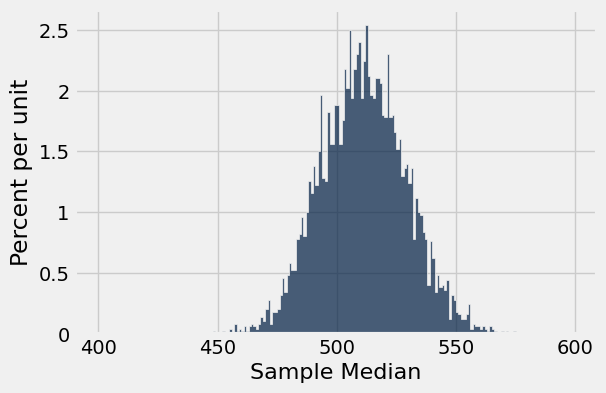

In [37]:
simulated_medians.hist(bins=np.arange(400,600,1))

The distributions of the sample medians from Steps 6 and 7 both exhibit a symmetric, bell-shaped pattern, reflecting the consistency and unbiased nature of the sampling process in estimating the population median. The centers of both distributions align closely with the population median, demonstrating that the sample medians are reliable estimators of this central tendency. However, there is a noticeable difference in the widths of the two histograms. The histogram with a narrower distribution indicates lower variability and greater precision in the sample medians, likely due to factors such as a larger sample size or reduced variability in the underlying population.